# Getting started

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

We start by importing the dataset, and having a look at the data.

In [28]:
# Load the character metadata using relative path

character_metadata = pd.read_csv("..\..\data\character.metadata.tsv", sep='\t')

column_names = ['Wikipedia_Movie_ID', 'Freebase_Movie_ID', 'Movie_Release_Date', 'Character_Name', 'Actor_DOB', 'Actor_Gender', 'Actor_Height', 'Actor_Ethnicity', 'Actor_Name', 'Actor_Age_At_Movie_Release', 'Freebase_Character_Actor_Map_ID', 'Freebase_character_ID', 'Freebase_Actor_ID']
character_metadata.columns = column_names

character_metadata.sample(5)

Wikipedia_Movie_ID Freebase_Movie_ID Movie_Release_Date  \
126643             3762449         /m/09zn92         1987-12-18   
328395             9477743        /m/028bfsc         2008-03-13   
273137              631251         /m/02ynvv         1979-09-12   
251372              442333         /m/029039         1985-03-08   
192747             8914059        /m/027pfrv         1996-04-20   

       Character_Name   Actor_DOB Actor_Gender  Actor_Height Actor_Ethnicity  \
126643            NaN         NaN          NaN           NaN             NaN   
328395       Roy King  1953-02-09            M         1.850       /m/03bkbh   
273137            NaN         NaN            M           NaN             NaN   
251372         Evelyn  1923-07-25            F         1.490       /m/048z7l   
192747            NaN  1951-12-01            M         1.676         /m/0x67   

             Actor_Name  Actor_Age_At_Movie_Release  \
126643  Macintyre Dixon                         NaN   
328395     Ciarán Hinds                        55.0   
273137    John Blundell                         NaN   
251372    Estelle Getty                        61.0   
192747   Obba Babatunde                        44.0   

       Freebase_Character_Actor_Map_ID Freebase_character_ID Freebase_Actor_ID  
126643                      /m/0gcmsr_                   NaN        /m/0gc61wd  
328395                      /m/0bvsttk            /m/0bvstzt         /m/077596  
273137                       /m/0k2_vv                   NaN         /m/0dd_c7  
251372                      /m/03jspfk            /m/0h33dmf         /m/030zjy  
192747                      /m/0cgpbg7                   NaN         /m/05bld9

For conveniance, we will add a new line called Movie_Release_Year that contains the year of release instead of the precise date. This will allow us to plot the distribution of movie year of release more nicely. We add the attribute "format = 'mixed'" because the movie release date is presented in different formats depending on the movie. Avoiding this attribute would lead to a considerable amount of NaN values in the release year, even for movies that actually have a non NaN release date.  

We repeat the same procedure for the actor date of birth.

In [29]:
character_metadata['Actor_DOB'] = pd.to_datetime(character_metadata['Actor_DOB'], format = 'mixed', errors='coerce')


character_metadata['Movie_Release_Date'] = pd.to_datetime(character_metadata['Movie_Release_Date'], format = 'mixed', errors='coerce', utc=True)
character_metadata['Movie_Release_Year'] = character_metadata['Movie_Release_Date'].dt.year


character_metadata['Actor_DOB'] = pd.to_datetime(character_metadata['Actor_DOB'], format = 'mixed', errors='coerce', utc=True)
character_metadata['Actor_YOB'] = character_metadata['Actor_DOB'].dt.year

character_metadata.sample(5)

C:\Users\llitz\AppData\Local\Temp\ipykernel_8396\1039685591.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  character_metadata['Actor_DOB'] = pd.to_datetime(character_metadata['Actor_DOB'], format = 'mixed', errors='coerce')


Wikipedia_Movie_ID Freebase_Movie_ID        Movie_Release_Date  \
24417               179064         /m/018fct 2001-09-12 00:00:00+00:00   
172460            26623381        /m/0bhcb06 2009-07-29 00:00:00+00:00   
415929            21994002        /m/05pbhlc 1958-01-01 00:00:00+00:00   
219000             1255098         /m/04mkph 1975-10-05 00:00:00+00:00   
292695            35122271        /m/0j6427n 2012-01-01 00:00:00+00:00   

       Character_Name                 Actor_DOB Actor_Gender  Actor_Height  \
24417             NaN 1931-08-22 00:00:00+00:00            M           NaN   
172460            NaN 1951-01-05 00:00:00+00:00            M           NaN   
415929            NaN 1912-02-02 00:00:00+00:00            M           NaN   
219000       Dr. Umon 1931-08-30 00:00:00+00:00            M           NaN   
292695            NaN 1976-03-15 00:00:00+00:00            M          1.85   

       Actor_Ethnicity         Actor_Name  Actor_Age_At_Movie_Release  \
24417              NaN      Bobby Harwell                        70.0   
172460             NaN  Jagathi Sreekumar                        58.0   
415929             NaN    Stefan Schnabel                        45.0   
219000             NaN       Jouji Yanami                        44.0   
292695       /m/02sch9         Abhay Deol                        35.0   

       Freebase_Character_Actor_Map_ID Freebase_character_ID  \
24417                       /m/0gcjtjz                   NaN   
172460                      /m/0ggf47y                   NaN   
415929                      /m/0djcbt0                   NaN   
219000                      /m/0j6t30q            /m/0j6t30t   
292695                      /m/0mzs7gp                   NaN   

       Freebase_Actor_ID  Movie_Release_Year  Actor_YOB  
24417         /m/02vn2q5              2001.0     1931.0  
172460         /m/048svj              2009.0     1951.0  
415929        /m/02qz4gj              1958.0     1912.0  
219000         /m/0k_pr0              1975.0     1931.0  
292695        /m/026ksyr              2012.0     1976.0

Let's have a look at the distribution of some features !

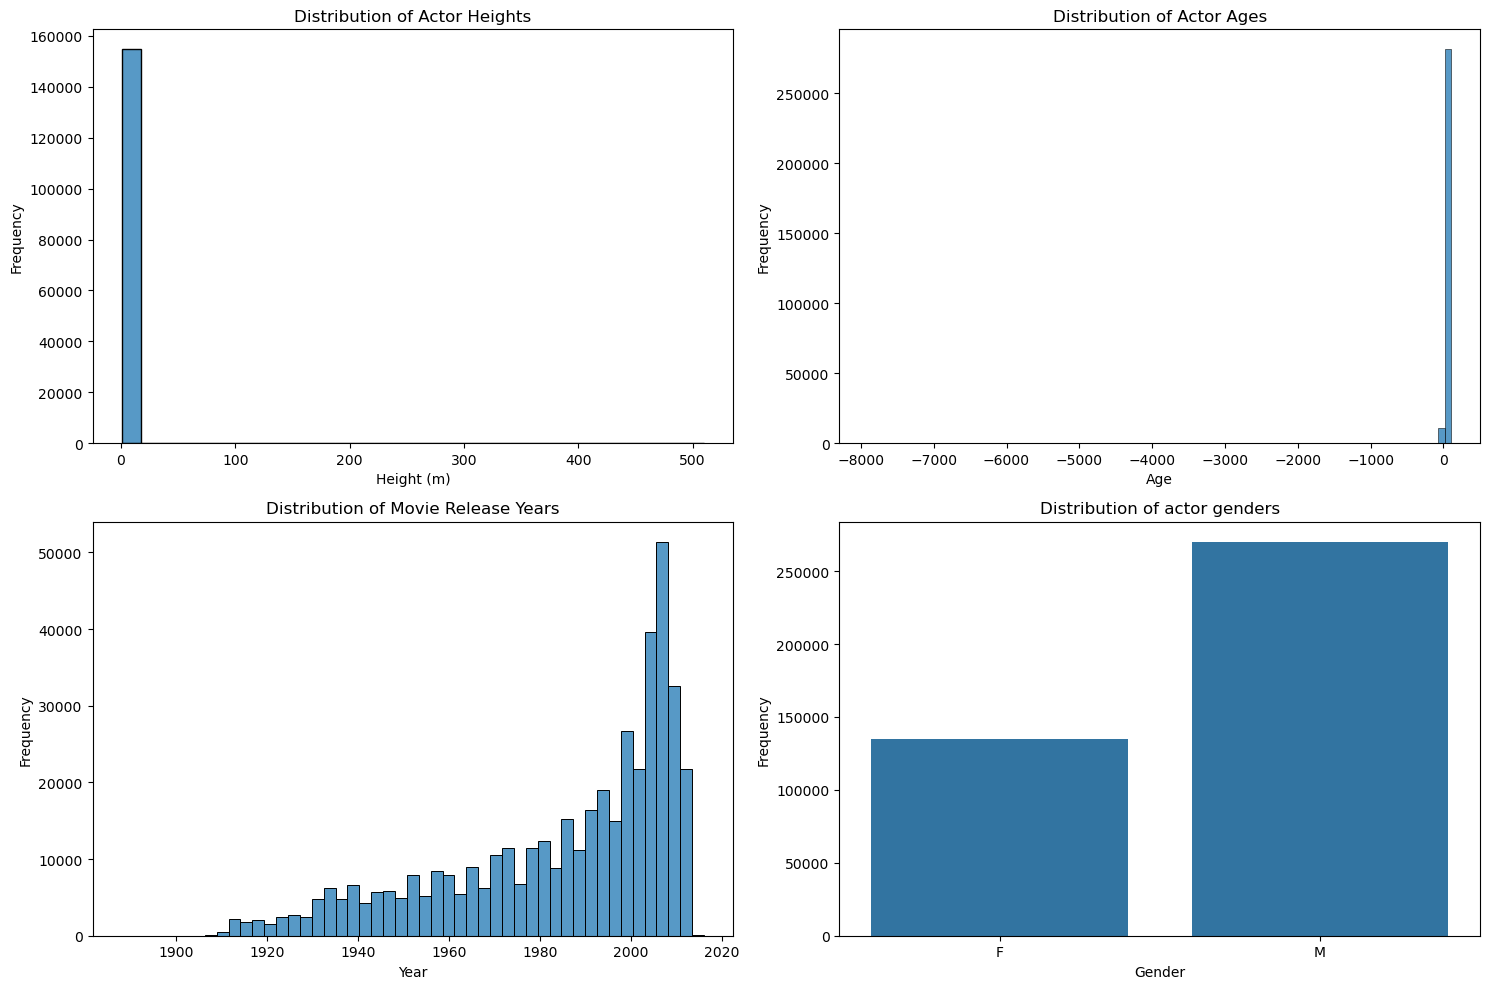

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(character_metadata['Actor_Height'], bins=30, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Actor Heights')
axs[0, 0].set_xlabel('Height (m)')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(character_metadata['Actor_Age_At_Movie_Release'], bins=92, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Actor Ages')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(character_metadata['Movie_Release_Year'], bins=49, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Movie Release Years')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Frequency')

sns.countplot(data=character_metadata, x='Actor_Gender', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of actor genders')
axs[1, 1].set_xlabel('Gender')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

We can observe that some values seem aberrant. We will have to clean the dataset to make sure to have reasonnable data.

# General preprocessing

We will first do a general preprocessing, and then we will focus on cleaning our data according to our subject of study. The general preprocessing will lead to a relatively small amount of data, but will be conveniant if we want to run a quick analysis on some specific features afterwards.

### Droping All NaNs and NaTs

Before dropping the missing values, we check their proportion for each feature of our dataset.

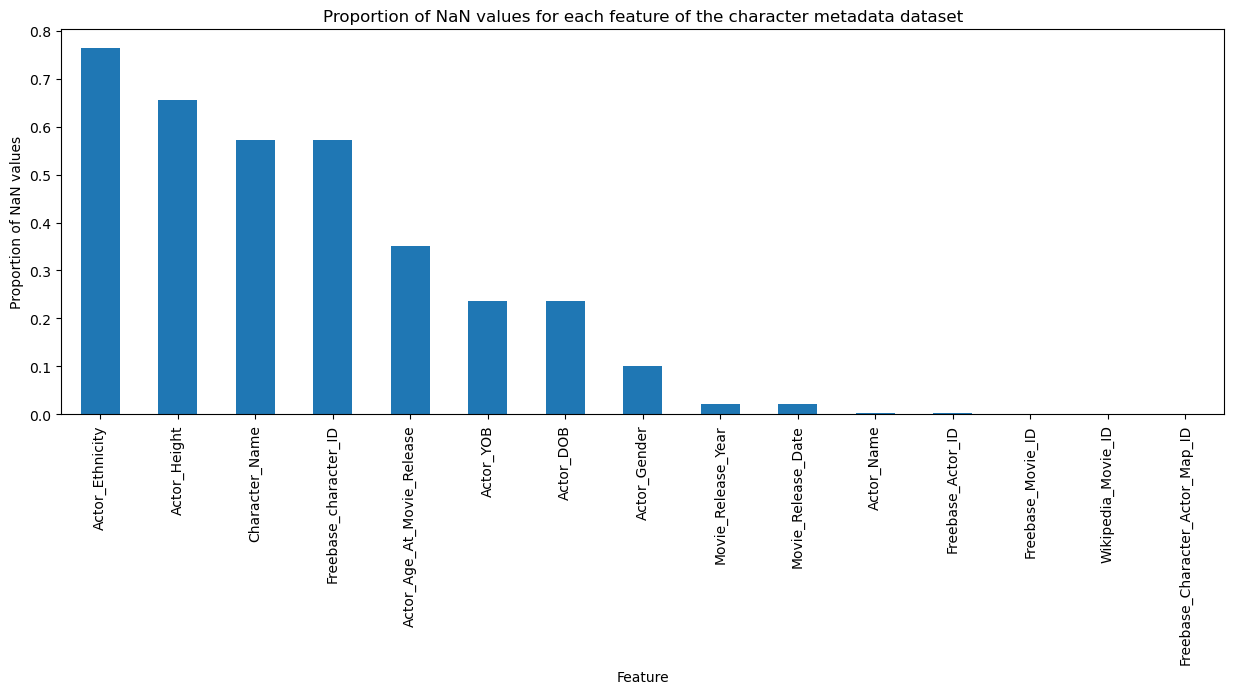

In [31]:
# plot the distibution of the proportion of nan values in each column of the character metadata dataframe. Sort them in descending order.

nan_proportions = character_metadata.isna().mean().sort_values(ascending=False)
nan_proportions.plot(kind='bar', figsize=(15, 5))
plt.title('Proportion of NaN values for each feature of the character metadata dataset')
plt.xlabel('Feature')
plt.ylabel('Proportion of NaN values')
plt.show()


We observe that some features contain a big amount of missing values, and we will need to be carefull about these features.

For now we do not focus on any feature, and we decide to drop every single empty values. As observed above, some columns have a majority of empty values, so dropping all the NaNs might not be a good idea when we want to do a targeted analysis. But for now we want a very general preprocessing, and we will later be more cautious.

In [32]:
copy1 = character_metadata.copy()
clean_data = copy1.dropna()

print("Length of original data: ", len(character_metadata), "Length of cleaned data: ", len(clean_data))

Length of original data:  450668 Length of cleaned data:  45264


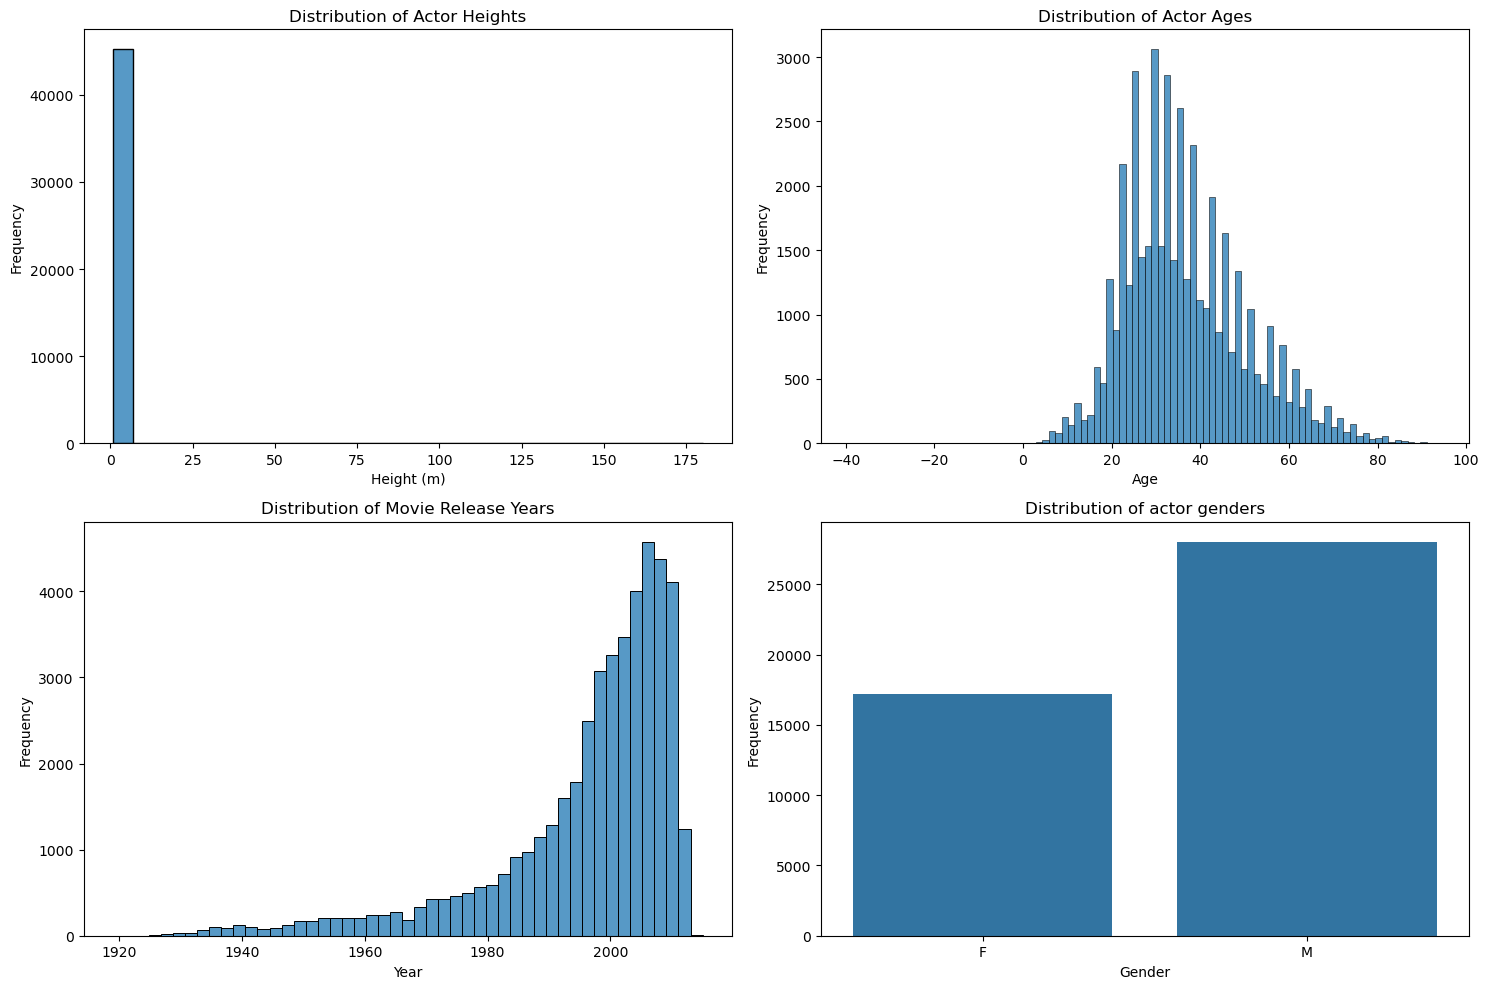

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(clean_data['Actor_Height'], bins=30, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Actor Heights')
axs[0, 0].set_xlabel('Height (m)')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(clean_data['Actor_Age_At_Movie_Release'], bins=92, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Actor Ages')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(clean_data['Movie_Release_Year'], bins=49, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Movie Release Years')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Frequency')

sns.countplot(data=clean_data, x='Actor_Gender', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of actor genders')
axs[1, 1].set_xlabel('Gender')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Although we removed empty values, we can still clearly observe aberrant values.

### Dropping aberrant values

We can see that even if there are no empty value, some values seem aberrant. We will get rid of these aberrant values.

In [34]:
clean_data = clean_data[clean_data['Actor_Height'] > 0]
clean_data = clean_data[clean_data['Actor_Height'] < 3]
clean_data = clean_data[clean_data['Actor_Age_At_Movie_Release'] > 0]
clean_data = clean_data[clean_data['Actor_Age_At_Movie_Release'] < 110]
clean_data = clean_data[clean_data['Movie_Release_Year'] > 1850]
clean_data = clean_data[clean_data['Movie_Release_Year'] < 2020]
clean_data = clean_data[clean_data['Actor_YOB'] > 1840]
clean_data = clean_data[clean_data['Actor_YOB'] < 2020]


print("Length of cleaned data after removing aberrant values: ", len(clean_data))

Length of cleaned data after removing aberrant values:  45236


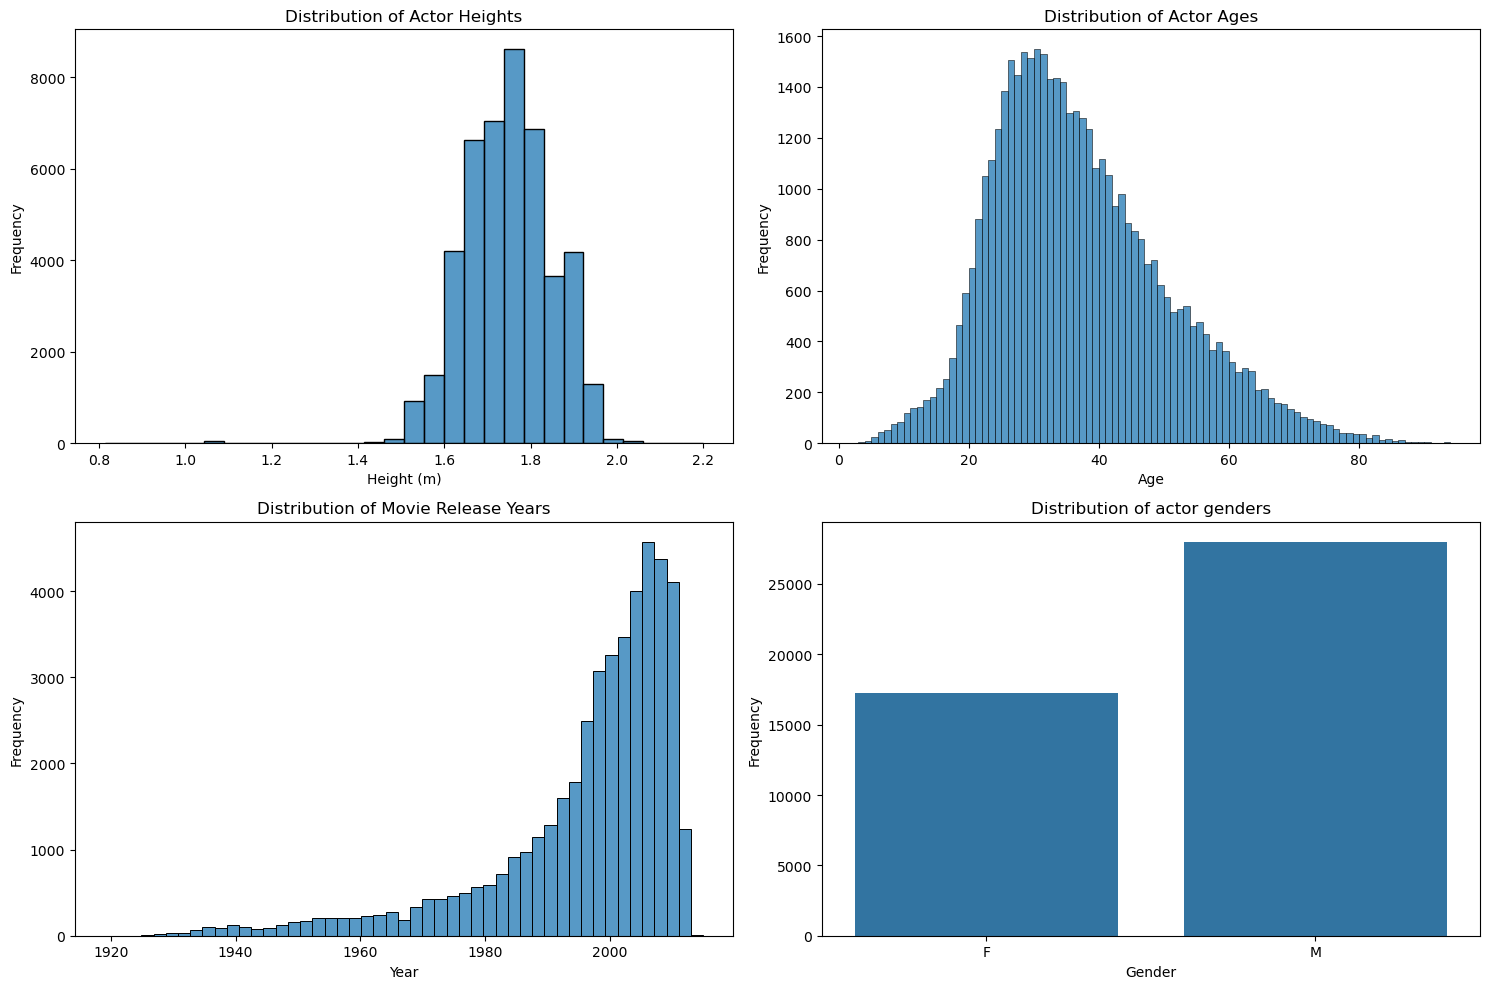

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(clean_data['Actor_Height'], bins=30, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Actor Heights')
axs[0, 0].set_xlabel('Height (m)')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(clean_data['Actor_Age_At_Movie_Release'], bins=92, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Actor Ages')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(clean_data['Movie_Release_Year'], bins=49, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Movie Release Years')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Frequency')

sns.countplot(data=clean_data, x='Actor_Gender', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of actor genders')
axs[1, 1].set_xlabel('Gender')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Now the data seem reasonable ! However, dropping all the empty values led to a significant decrease in the amount of data, and we probably dropped some useful information for our analysis.

We will now start again the exact same preprocessing from the original dataset, but we will focus on our subject, and drop only the empty values of the categories we are interested in. 

# Taking into acount our subject

We are studying the impact of 9/11 on the movie industry. In this dataset, we are particularly interested in the release year and the actor ethnicity. We will get rid of all the useless columns.

First of all, we are interested in the column "ethnicity", so we need to create a function that maps from FreebaseID to the corresponding label. To do so, we use the freebase-wikidata-mapping dataset found here : https://www.kaggle.com/datasets/latebloomer/freebase-wikidata-mapping/data. 

In [36]:
def freebase2label(freebase_id, mapping_dataframe):
    label = mapping_dataframe[mapping_dataframe['freebase_id'] == freebase_id]['label']
    if len(label) > 0:
        return label.values[0]
    else:
        return None
    
file_path = r"..\..\data\freebase_mapping.tsv"
freebase_mapping_df = pd.read_csv(file_path, sep='\t')

Before applying our function, we first need to clean the dataset. Let's first remove the columns we're not interested in.

In [37]:
dataset = character_metadata.copy()
dataset = dataset.drop(columns=['Movie_Release_Date', 'Actor_DOB', 'Actor_Gender', 'Actor_Height', 'Actor_YOB'])

In [38]:
dataset.sample(5)

Wikipedia_Movie_ID Freebase_Movie_ID     Character_Name  \
16208              9653770        /m/02pn80f     Ramona Gladwyn   
128837             2312056         /m/072zl1  Fitzwilliam Darcy   
114895            20089025        /m/04yh4qp                NaN   
182982             7077556         /m/0h32tg                NaN   
46041              2141418         /m/06ptw1     Neil McCormick   

       Actor_Ethnicity            Actor_Name  Actor_Age_At_Movie_Release  \
16208              NaN         Ginger Rogers                        40.0   
128837       /m/02w7gg     Matthew Macfadyen                        30.0   
114895             NaN      William H. Isler                         NaN   
182982             NaN         Dorothy Tutin                        27.0   
46041        /m/013b6_  Joseph Gordon-Levitt                        23.0   

       Freebase_Character_Actor_Map_ID Freebase_character_ID  \
16208                       /m/02vcpt7            /m/0h1psn7   
128837                       /m/0k22sk             /m/0f4lq_   
114895                      /m/0h2pcyf                   NaN   
182982                      /m/02vd0dq                   NaN   
46041                        /m/0k122w            /m/09tx91l   

       Freebase_Actor_ID  Movie_Release_Year  
16208           /m/0h7dd              1952.0  
128837         /m/03rnz7              2005.0  
114895        /m/0gz0qk0              2008.0  
182982          /m/0m9wx              1958.0  
46041          /m/05zbm4              2004.0

Depending on what feature we want to study, we drop the missing values in the corresponding columns.

In [39]:
release_year_dataset = dataset.copy()
release_year_dataset = release_year_dataset.dropna(subset=['Movie_Release_Year'])

ethnicity_dataset = dataset.copy()
ethnicity_dataset = ethnicity_dataset.dropna(subset=['Actor_Ethnicity'])

no_nan_dataset = dataset.copy()
no_nan_dataset = no_nan_dataset.dropna(subset=['Movie_Release_Year', 'Actor_Ethnicity'])

print("Length of original dataset: ", len(dataset))

print("Length of dataset with no NaN values in Movie_Release_Year: ", len(release_year_dataset))
print("Length of dataset with no NaN values in Actor_Ethnicity: ", len(ethnicity_dataset))
print("Length of dataset with no NaN values in both Movie_Release_Year and Actor_Ethnicity: ", len(no_nan_dataset))

Length of original dataset:  450668
Length of dataset with no NaN values in Movie_Release_Year:  440658
Length of dataset with no NaN values in Actor_Ethnicity:  106058
Length of dataset with no NaN values in both Movie_Release_Year and Actor_Ethnicity:  102842


In [40]:
release_year_dataset = release_year_dataset[release_year_dataset['Actor_Age_At_Movie_Release'] > 0]
release_year_dataset = release_year_dataset[release_year_dataset['Actor_Age_At_Movie_Release'] < 110]
release_year_dataset = release_year_dataset[release_year_dataset['Movie_Release_Year'] > 1850]
release_year_dataset = release_year_dataset[release_year_dataset['Movie_Release_Year'] < 2020]

print("Length of release year dataset after removing aberrant values: ", len(release_year_dataset))

ethnicity_dataset = ethnicity_dataset[ethnicity_dataset['Actor_Age_At_Movie_Release'] > 0]
ethnicity_dataset = ethnicity_dataset[ethnicity_dataset['Actor_Age_At_Movie_Release'] < 110]
ethnicity_dataset = ethnicity_dataset[ethnicity_dataset['Movie_Release_Year'] > 1850]
ethnicity_dataset = ethnicity_dataset[ethnicity_dataset['Movie_Release_Year'] < 2020]

print("Length of ethnicity dataset after removing aberrant values: ", len(ethnicity_dataset))

no_nan_dataset = no_nan_dataset[no_nan_dataset['Actor_Age_At_Movie_Release'] > 0]
no_nan_dataset = no_nan_dataset[no_nan_dataset['Actor_Age_At_Movie_Release'] < 110]
no_nan_dataset = no_nan_dataset[no_nan_dataset['Movie_Release_Year'] > 1850]
no_nan_dataset = no_nan_dataset[no_nan_dataset['Movie_Release_Year'] < 2020]

print("Length of no nan dataset after removing aberrant values: ", len(no_nan_dataset))


Length of release year dataset after removing aberrant values:  292122
Length of ethnicity dataset after removing aberrant values:  93246
Length of no nan dataset after removing aberrant values:  93246


We can now check that the data seems reasonnably distributed and that it does not contain aberrant values.

<Figure size 1500x500 with 0 Axes>

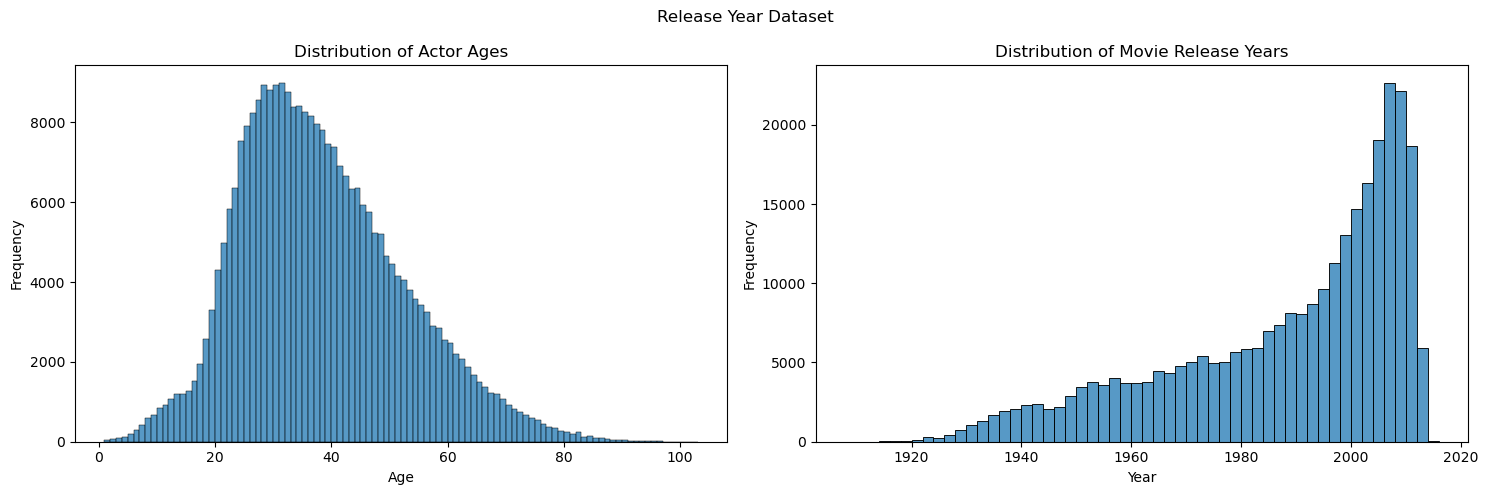

In [41]:
plt.figure(figsize=(15, 5))
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(release_year_dataset['Actor_Age_At_Movie_Release'], bins=102, ax=axs[0])
axs[0].set_title('Distribution of Actor Ages')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

sns.histplot(release_year_dataset['Movie_Release_Year'], bins=54, ax=axs[1])
axs[1].set_title('Distribution of Movie Release Years')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Frequency')

plt.suptitle('Release Year Dataset')
plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

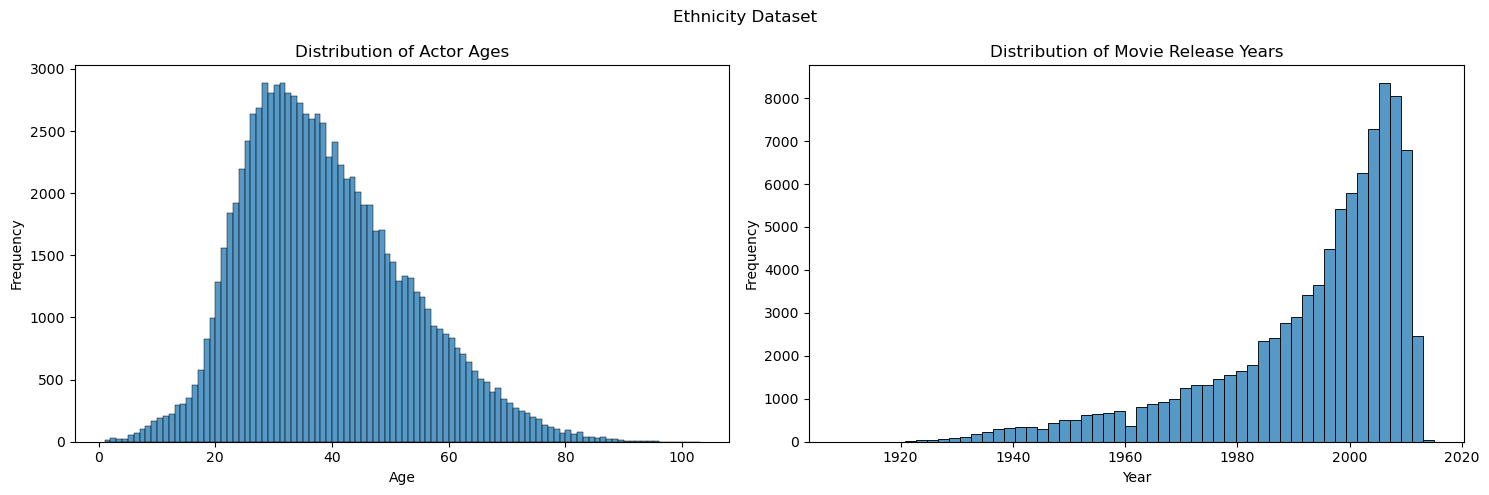

In [42]:
plt.figure(figsize=(15, 5))
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(ethnicity_dataset['Actor_Age_At_Movie_Release'], bins=102, ax=axs[0])
axs[0].set_title('Distribution of Actor Ages')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

sns.histplot(ethnicity_dataset['Movie_Release_Year'], bins=54, ax=axs[1])
axs[1].set_title('Distribution of Movie Release Years')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Frequency')

plt.suptitle('Ethnicity Dataset')
plt.tight_layout()
plt.show()

Now that we have cleaned our data, we want to change the freebase IDs in the ethnicity column to labels that are understandable. To achieve this, we use the function previously introduced. 

In [43]:
from tqdm import tqdm

for i in tqdm(range(len(no_nan_dataset))):
    no_nan_dataset.loc[i, 'Ethnicity_Label'] = freebase2label(no_nan_dataset['Actor_Ethnicity'].iloc[i], freebase_mapping_df)

# Drop rows that could not be mapped
no_nan_dataset = no_nan_dataset.dropna(subset='Ethnicity_Label')

100%|██████████| 93246/93246 [3:37:21<00:00,  7.15it/s]  


In [44]:
# save as tsv at the location "..\..\data\preprocessed_character_metadata.tsv"

no_nan_dataset.to_csv(r"..\..\data\preprocessed_character_metadata.tsv", sep='\t', index=False)

That's about it ! The preprocessing is ready for our analysis on the character dataset !

In [48]:
no_nan_dataset.sample(10)

Wikipedia_Movie_ID Freebase_Movie_ID Character_Name Actor_Ethnicity  \
76201          27948972.0        /m/0ch21cr         Gaynes      /m/0cnvdq1   
38063                 NaN               NaN            NaN             NaN   
12795          10289905.0         /m/046tlz            NaN      /m/0dryh9k   
72681                 NaN               NaN            NaN             NaN   
22332          15662745.0        /m/03nnzcn            NaN       /m/01rv7x   
4687                  NaN               NaN            NaN             NaN   
85831                 NaN               NaN            NaN             NaN   
57928                 NaN               NaN            NaN             NaN   
40870                 NaN               NaN            NaN             NaN   
17495                 NaN               NaN            NaN             NaN   

            Actor_Name  Actor_Age_At_Movie_Release  \
76201  Lance Henriksen                        62.0   
38063              NaN                         NaN   
12795    Meera Jasmine                        20.0   
72681              NaN                         NaN   
22332           Seetha                        40.0   
4687               NaN                         NaN   
85831              NaN                         NaN   
57928              NaN                         NaN   
40870              NaN                         NaN   
17495              NaN                         NaN   

      Freebase_Character_Actor_Map_ID Freebase_character_ID Freebase_Actor_ID  \
76201                      /m/0ggk_7x            /m/0ggk_7_         /m/02zhkz   
38063                             NaN                   NaN               NaN   
12795                       /m/0jtlmh                   NaN         /m/05qtrd   
72681                             NaN                   NaN               NaN   
22332                      /m/0ggfnzc                   NaN        /m/02rtlm3   
4687                              NaN                   NaN               NaN   
85831                             NaN                   NaN               NaN   
57928                             NaN                   NaN               NaN   
40870                             NaN                   NaN               NaN   
17495                             NaN                   NaN               NaN   

       Movie_Release_Year    Ethnicity_Label  
76201              2002.0     English people  
38063                 NaN    Irish Americans  
12795              2003.0  African Americans  
72681                 NaN             Indian  
22332              2007.0  Chinese Americans  
4687                  NaN             Indian  
85831                 NaN      Jewish people  
57928                 NaN             Indian  
40870                 NaN             Indian  
17495                 NaN               Nair

In [46]:
len(no_nan_dataset)

81608